In [ ]:
"""
Итак... Выбрал я датасет в котором содержатся сведения об урожайности 5 культур (хлопок, рис, соя, кукуруза, пшеница) на 500 различных полях в различных регионах планеты.
Посмотрим на данные с датчиков (влажность почвы, средняя температура, количество осадков, зараженность болезнями и тд) и попробуем на основании их спрогнозировать урожайность культур.

"""

In [111]:
#Загрузим датасет и взглянем на данные
import pandas as pd
df = pd.read_csv('Smart_Farming_Crop_Yield_2024.csv')
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [94]:
#Видим в данных как текстовые значения, так и числовые, так и даты (которые тоже определяются как текст)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [95]:
# видим что разброс очень существенный, есть культуры которые получили только 50мм осадков, есть те, которые получили 300мм, есть те которые сильно обрабатывали пестицидами, есть те, которые почти не трогали...
df.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [98]:
# Теперь построим немного графиков
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

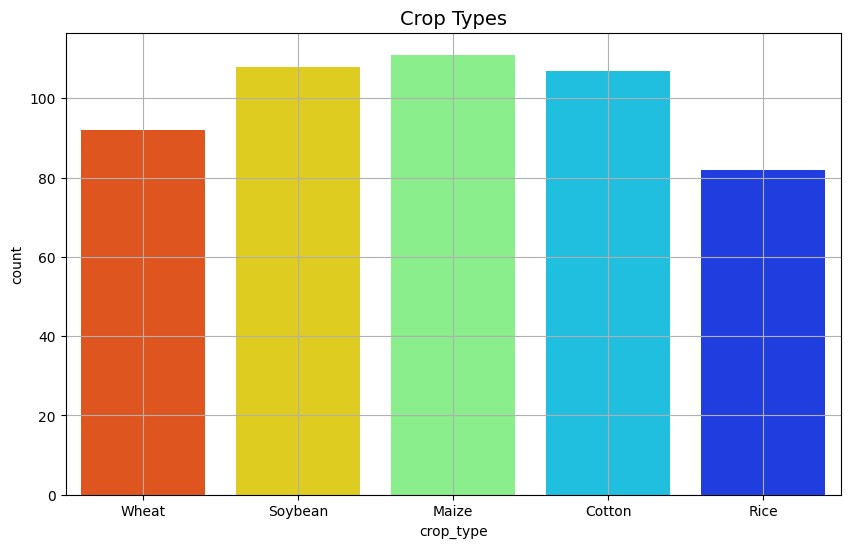

In [99]:
#посмотрим сколько наблюдейний с разбивкой по культурам
plt.figure(figsize=(10,6))
plt.title('Crop Types', fontsize=14)
sns.countplot(x=df['crop_type'], palette='jet_r')
plt.grid()
plt.show()

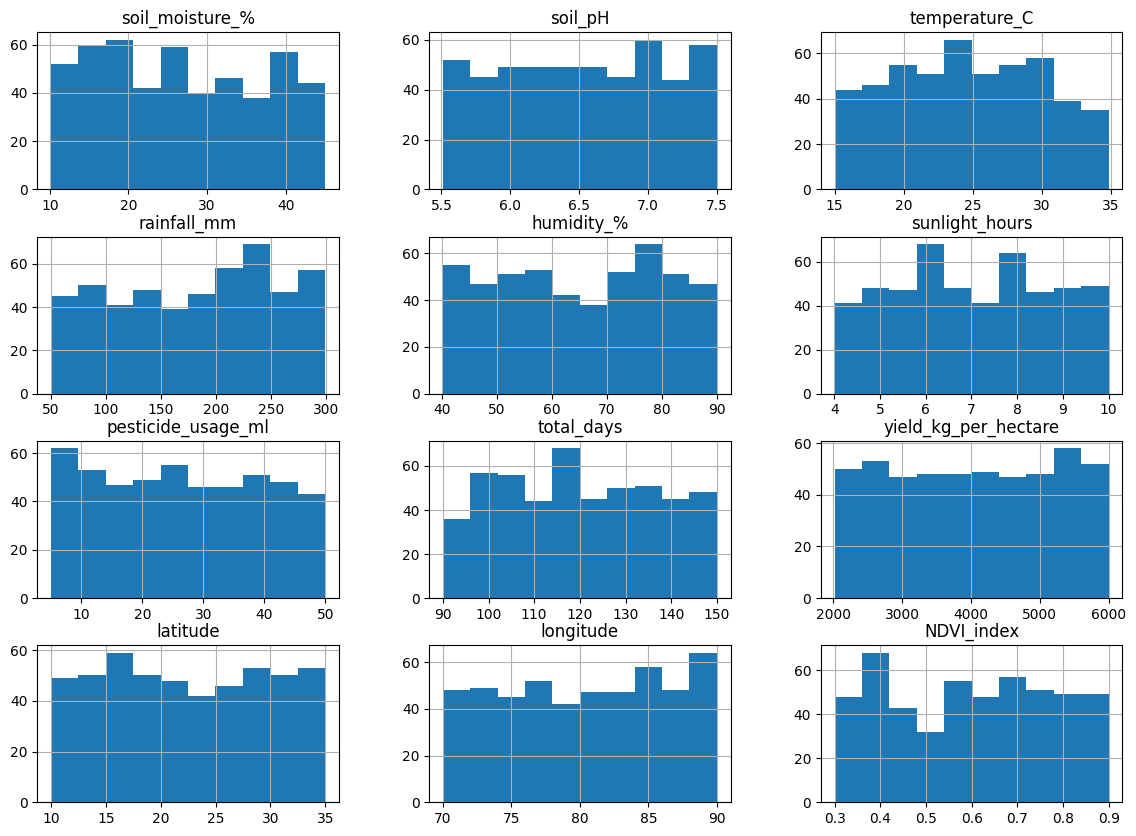

In [100]:
#графики относительно ровные, явных перекосов в наблюдении нет...
df.hist(figsize=(14,10))
plt.show()

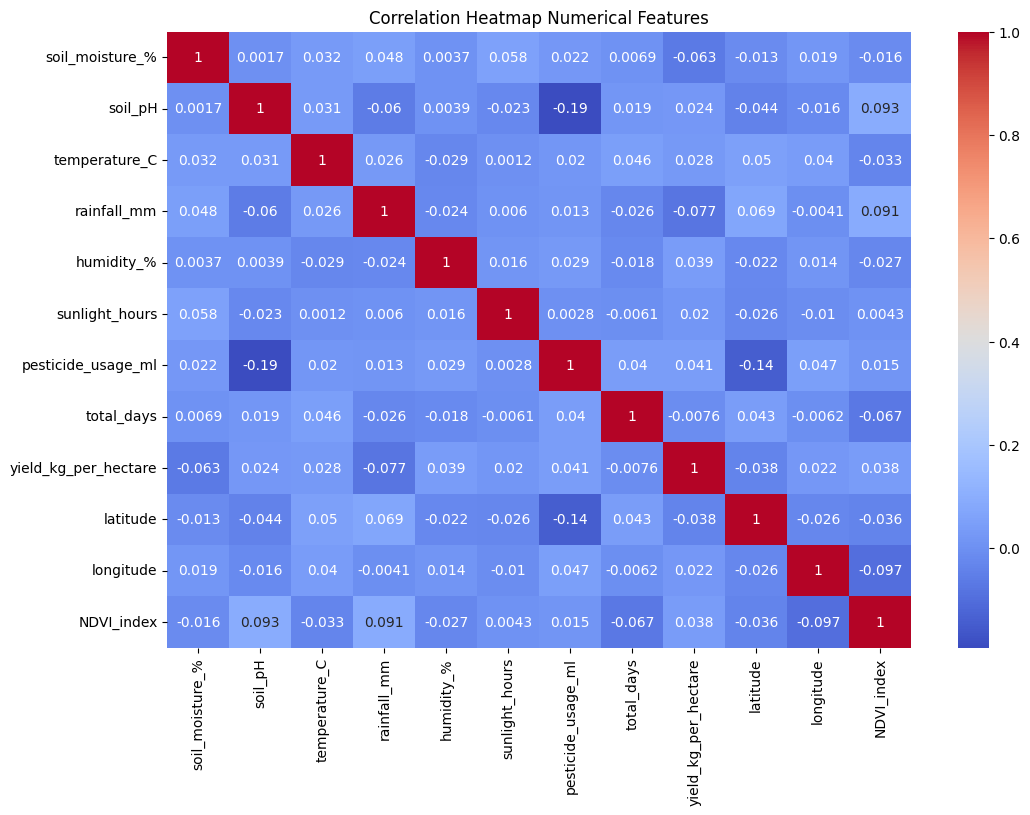

In [101]:
#вот есть карта корреляции.. есть показатель влажности почфы, влажности воздуха и количества осадков, всё связанно с водой, а между ними как-то нет зависимости, странно это...
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Numerical Features")
plt.show()


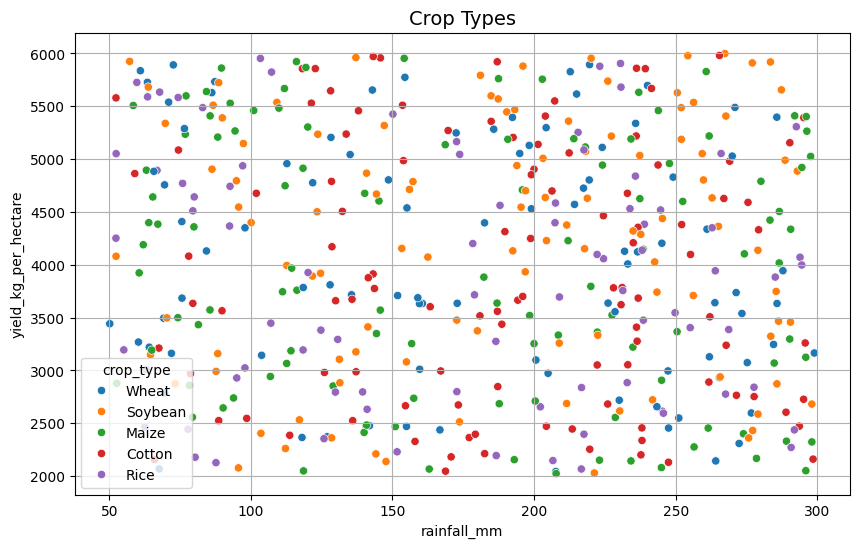

In [102]:
#посмотрим сколько наблюдейний с разбивкой по культурам
#тут я долго писал сравнение мировой урожайности сои и кукурузы, что какие-то странные данные (сои какой-то большой урожай, а кукурузы маленький),
#но оно удалилось, поэтому, поверьте наслова, пока предполагаю что датасет не очень качественный
plt.figure(figsize=(10,6))
plt.title('Crop Types', fontsize=14)
sns.scatterplot(data=df, x='rainfall_mm', y='yield_kg_per_hectare', hue='crop_type')
plt.grid()
plt.show()

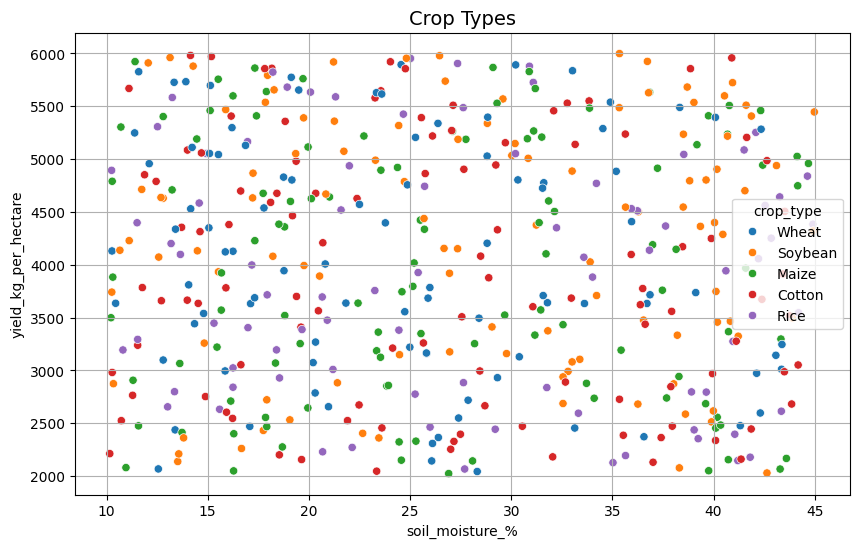

In [103]:
#а тут тоже не понятно.... рис в воде выращивается, там влажность почвы 100% должна быть всегда, а тут....
plt.figure(figsize=(10,6))
plt.title('Crop Types', fontsize=14)
sns.scatterplot(data=df, x='soil_moisture_%', y='yield_kg_per_hectare', hue='crop_type')
plt.grid()
plt.show()

In [104]:
# ну доведем уже обучение до конца, нам надо преобразовать текстовые данные, будем использовать LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()
for i in ['crop_type', 'irrigation_type', 'fertilizer_type', 'crop_disease_status', 'region']:
    df[i] = encoder.fit_transform(df[i])

In [105]:
# разделим данные на тренировочные и тестовые, удалим все поля которые не влияют на результат
from sklearn.model_selection import train_test_split
X = df.drop(columns=['yield_kg_per_hectare', 'farm_id', 'sowing_date', 'harvest_date', 'sensor_id', 'timestamp'])
y = df['yield_kg_per_hectare']

X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.2)


In [106]:
# подгрузим наши алгоритмы
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso

In [107]:
!pip install catboost

In [108]:
# скалируем данные
scaler = StandardScaler()
scaler.fit(X_train,X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Name: Lasso
 R2 Score: -0.05
 MSE: 1543958.6678304865


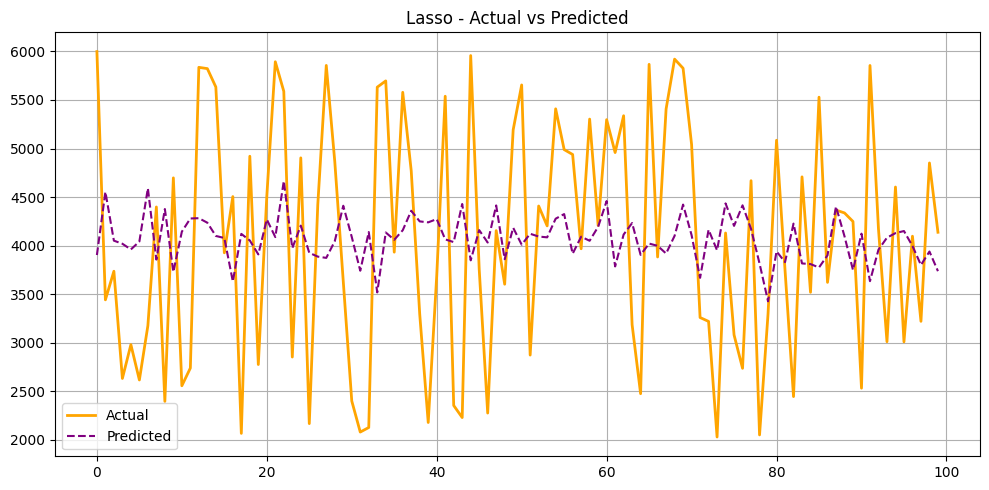


 Name: Cat Boost Regressor
 R2 Score: -0.01
 MSE: 1485788.8958297053


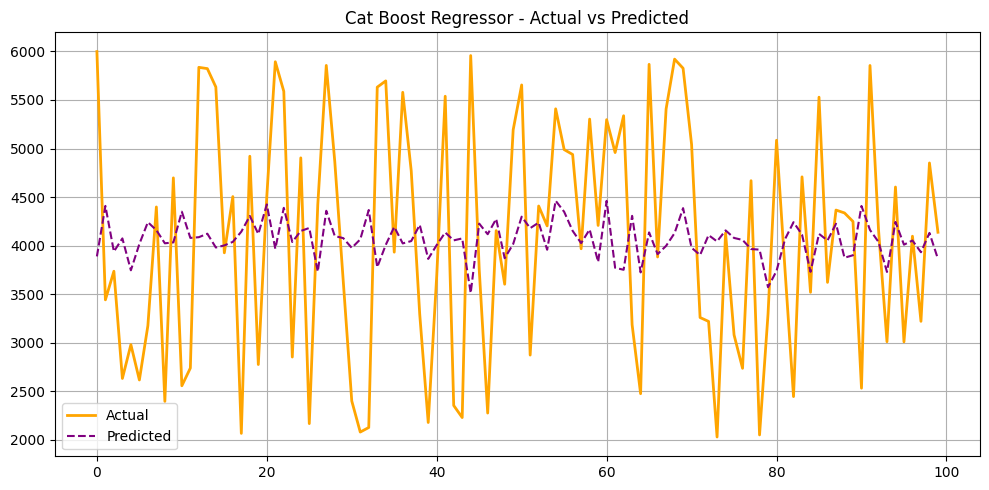


 Name: Ada Boost Regressor
 R2 Score: -0.01
 MSE: 1488141.4868262238


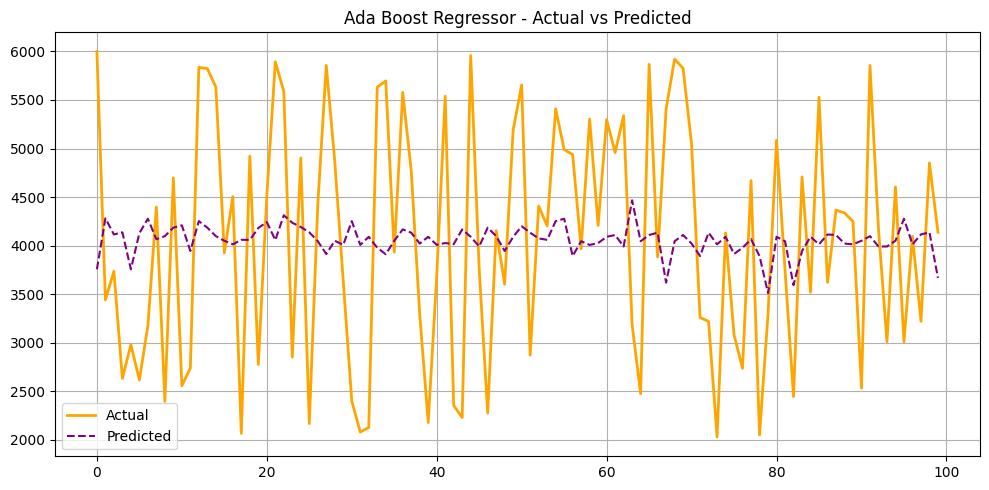


 Name: Extra Trees Regressor
 R2 Score: -0.05
 MSE: 1541391.93620601


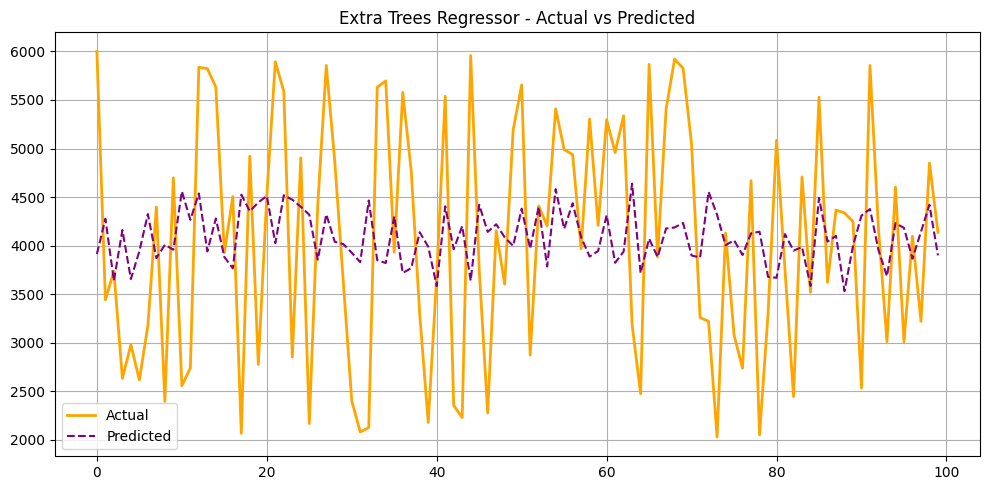


 Name: XGB Regressor
 R2 Score: -0.16
 MSE: 1707690.0245843


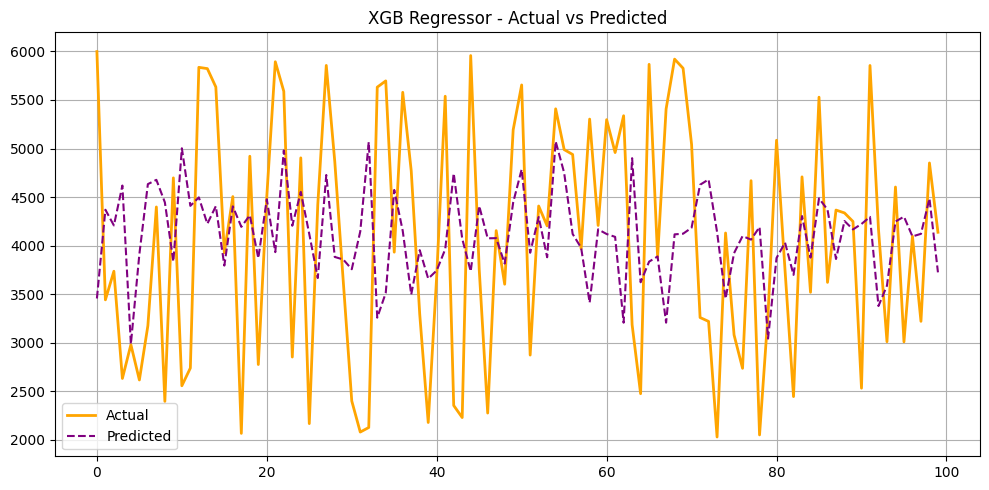

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1314
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 16
[LightGBM] [Info] Start training from score 4024.363284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

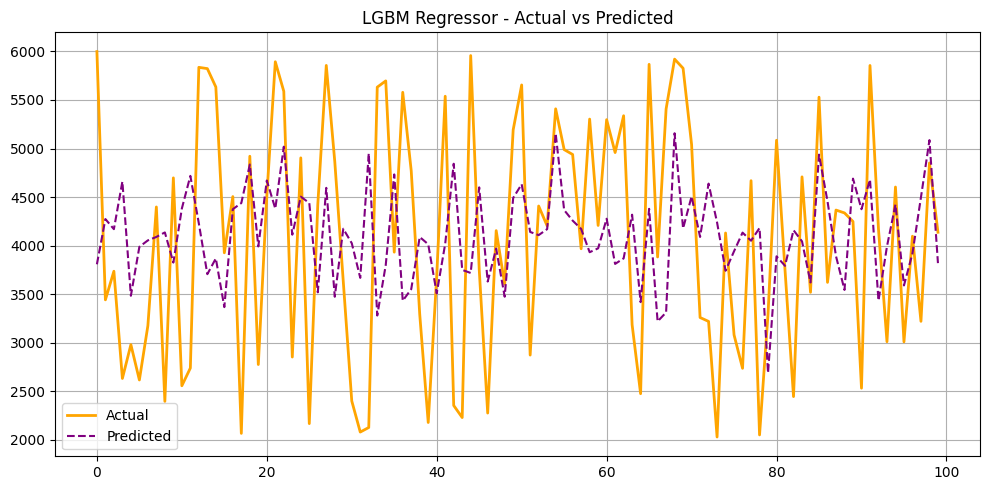


 Name: Linear Regression
 R2 Score: -0.05
 MSE: 1544112.663901487


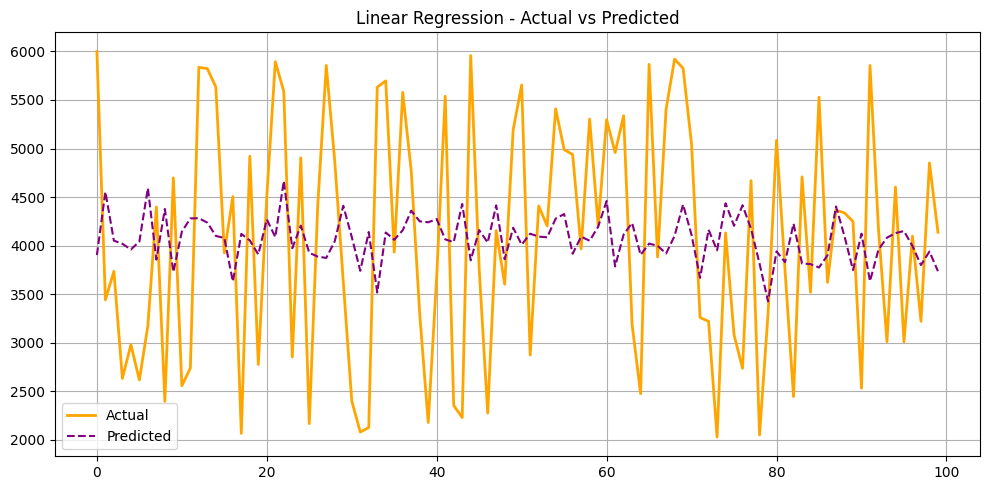


 Name: Random Forest
 R2 Score: -0.01
 MSE: 1484768.2627597225


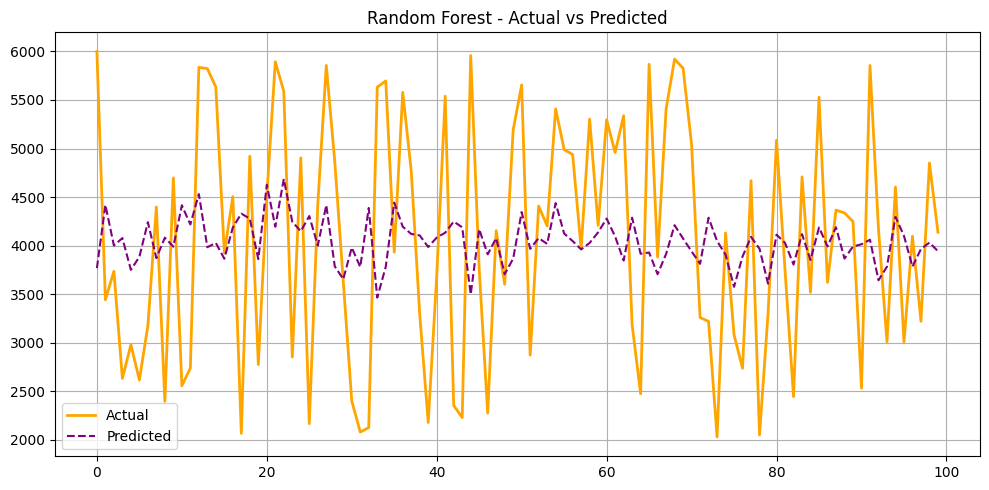


 Name: Gradient Boosting
 R2 Score: -0.10
 MSE: 1615019.2577929955


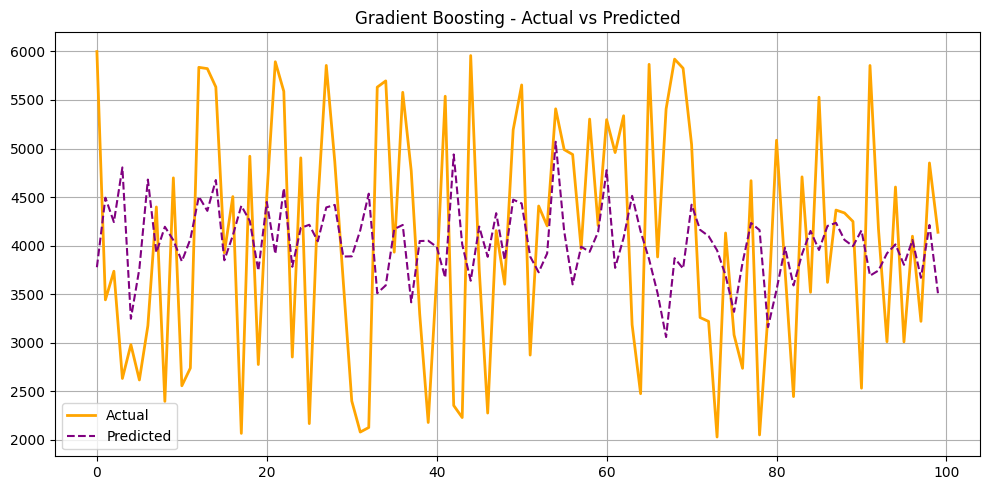


 Name: K-Nearest Neighbors
 R2 Score: -0.07
 MSE: 1572513.2072353999


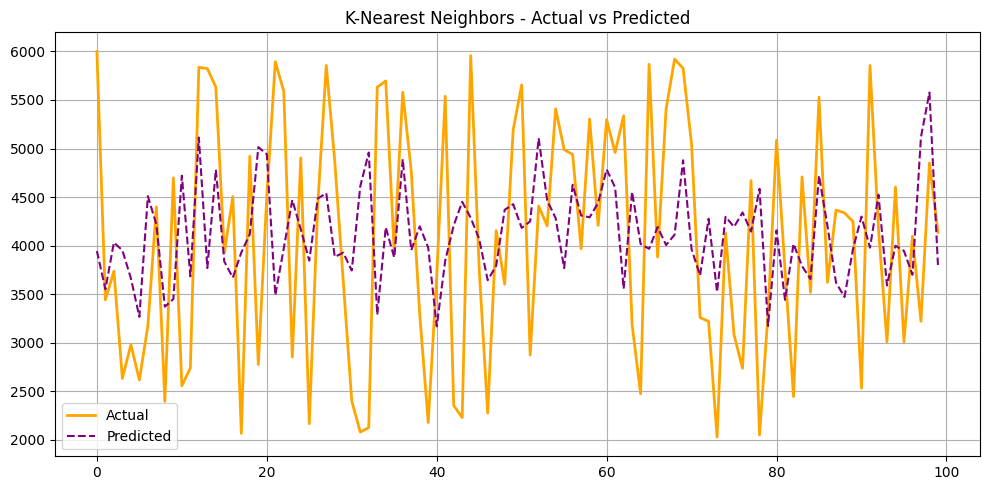


 Name: Decision Tree
 R2 Score: -0.78
 MSE: 2615926.821016


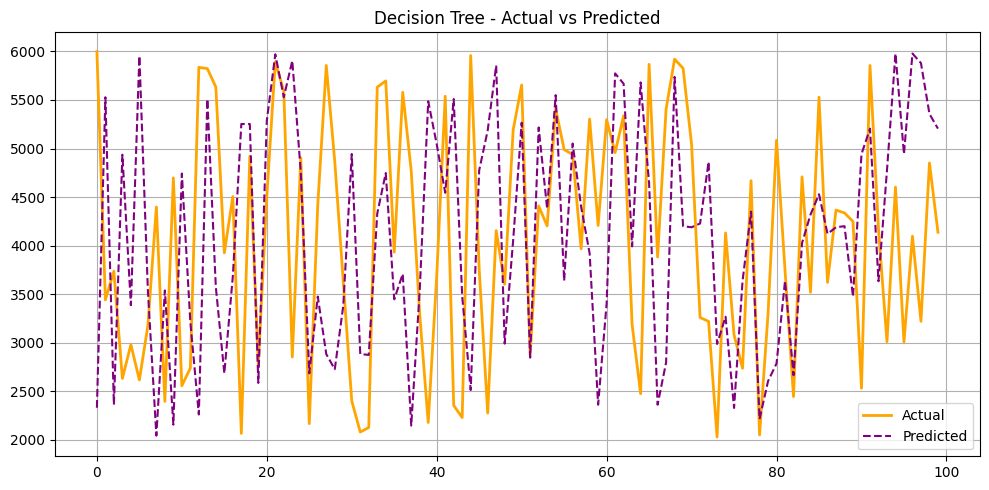


  Model Evaluation Summary:


,Model Name,R2 Score,MSE
0,Lasso,-0.051060,1.543959e+06
1,Cat Boost Regressor,-0.011461,1.485789e+06
2,Ada Boost Regressor,-0.013062,1.488141e+06
3,Extra Trees Regressor,-0.049313,1.541392e+06
4,XGB Regressor,-0.162521,1.707690e+06
5,LGBM Regressor,-0.100495,1.616577e+06
6,Linear Regression,-0.051165,1.544113e+06
7,Random Forest,-0.010766,1.484768e+06
8,Gradient Boosting,-0.099435,1.615019e+06
9,K-Nearest Neighbors,-0.070499,1.572513e+06


In [109]:
# Подсмотрел очень красивый цикл для обучения сразу на всех алгоритмах, не удержался, забрал себе)
models = {
    "Lasso": Lasso(alpha=0.1),
    "Cat Boost Regressor": CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, random_state=42, verbose=0),
    "Ada Boost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(n_estimators=100,n_jobs=1,random_state=42),
    "XGB Regressor": XGBRegressor(colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8),
    "LGBM Regressor": LGBMRegressor(),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100,n_jobs=4),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}
summary = []
for names, model in models.items():
    model.fit(X_train_scaled,y_train)
    preds = model.predict(X_test_scaled)
    score = r2_score(y_test,preds)
    mse = mean_squared_error(y_test,preds)

    print(f"\n Name: {names}")
    print(f" R2 Score: {score:.2f}")
    print(f" MSE: {mse}")

    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual', color='orange', linewidth=2)
    plt.plot(preds, label='Predicted', color='purple', linestyle='dashed')
    plt.title(f'{names} - Actual vs Predicted')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    summary.append({
        'Model Name': names,
        'R2 Score': score,
        'MSE':mse
    })
    new_df = pd.DataFrame(summary)
print("\n  Model Evaluation Summary:")
new_df

In [ ]:
"""
Ну что я могу сказать... и R2 и MSE получились очень и очень плохими для всех моделей...
Почему такие низкие метрики? Потому что:
1. данных очень мало (всего 500 наблюдений), да данные эти очень дорогие и очень долго копятся, но их все равно не достаточно
2. Все данные только за 2024 год, а учитывая специфику - один год в сельском хозяйстве не показатель
3. Помимо перечисленных параметров есть куча других факторов, влияющих на урожайность, например начальное плодородие почвы, густота посева, всхожесть и тд
4. Не понятно соблюдалась ли агротехника (те же подкормки и обработки пестицидами можно провести не в срок)
5. Да и сразу 5 культур с разными зависимостями от факторов, если взять одну культуру, то останется вообще около ста наблюдений, а не 500...
Да и в целом у меня большие вопросы к качеству данных, может, они и правдивы, но выдернуты из контекста
"""

In [112]:
#попробовал провести обучение только на одной культуре - результат не прям супер, для кукурузы Ada Boost показал R2 хотя бы положительный
df1 = df[df['crop_type'] == "Maize"]
print(df1)

      farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
3    FARM0004  Central USA     Maize            17.33     6.03          33.73   
7    FARM0008  East Africa     Maize            27.10     5.72          22.26   
12   FARM0013    South USA     Maize            42.43     7.07          20.70   
14   FARM0015  South India     Maize            23.85     6.84          21.00   
15   FARM0016  Central USA     Maize            15.52     7.17          29.07   
..        ...          ...       ...              ...      ...            ...   
472  FARM0473  Central USA     Maize            37.23     5.79          30.96   
473  FARM0474  East Africa     Maize            29.30     6.71          32.93   
478  FARM0479  Central USA     Maize            26.91     6.03          15.04   
479  FARM0480    South USA     Maize            10.31     6.36          18.95   
491  FARM0492  North India     Maize            32.14     7.44          21.49   

     rainfall_mm  humidity_

In [113]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()
for i in ['crop_type', 'irrigation_type', 'fertilizer_type', 'crop_disease_status', 'region']:
    df1[i] = encoder.fit_transform(df1[i])

In [114]:

X1 = df1.drop(columns=['yield_kg_per_hectare', 'farm_id', 'sowing_date', 'harvest_date', 'sensor_id', 'timestamp'])
y1 = df1['yield_kg_per_hectare']

X_train1,X_test1, y_train1,y_test1 = train_test_split(X1,y1 , test_size=0.2)

In [115]:
# скалируем данные
scaler = StandardScaler()
scaler.fit(X_train,X_test)
X_train_scaled1 = scaler.transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)


 Name: Lasso
 R2 Score: -0.18
 MSE: 1578877.4300851633


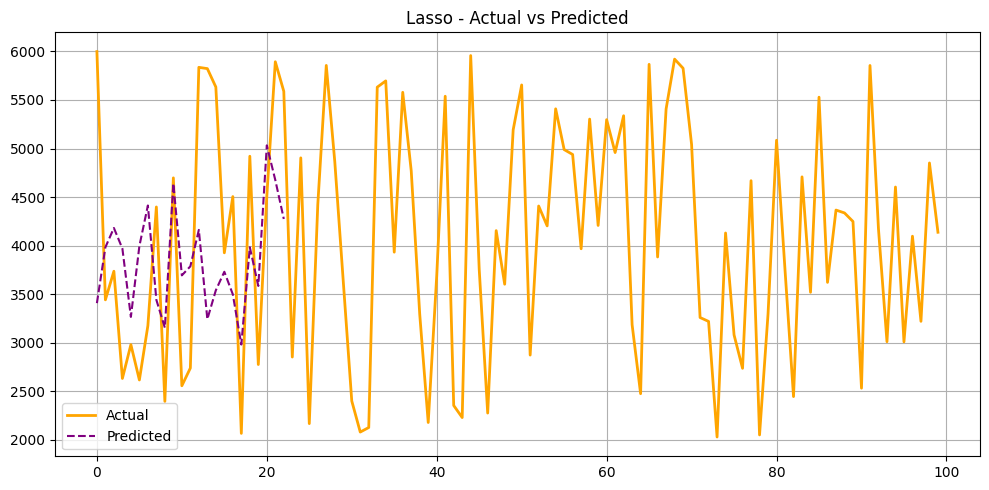


 Name: Cat Boost Regressor
 R2 Score: 0.07
 MSE: 1251620.922755645


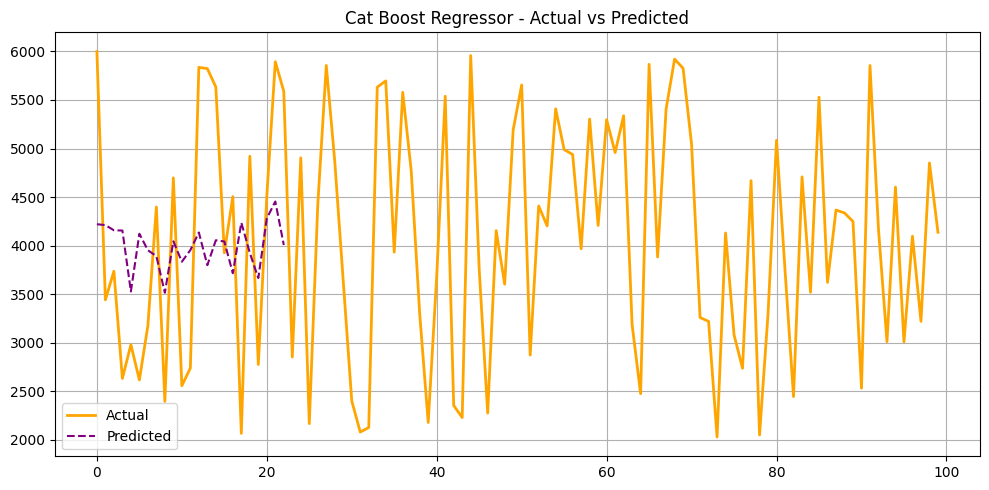


 Name: Ada Boost Regressor
 R2 Score: 0.10
 MSE: 1205478.20514844


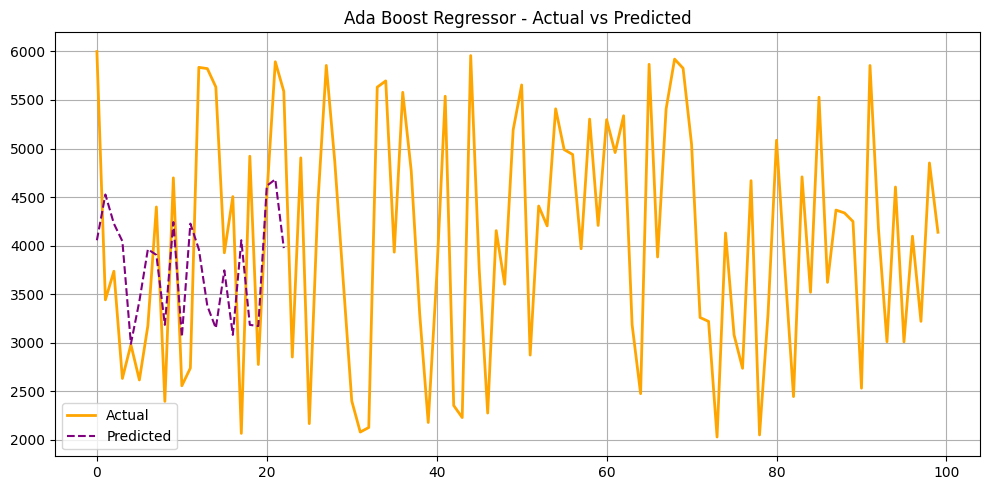


 Name: Extra Trees Regressor
 R2 Score: 0.05
 MSE: 1270009.5084268528


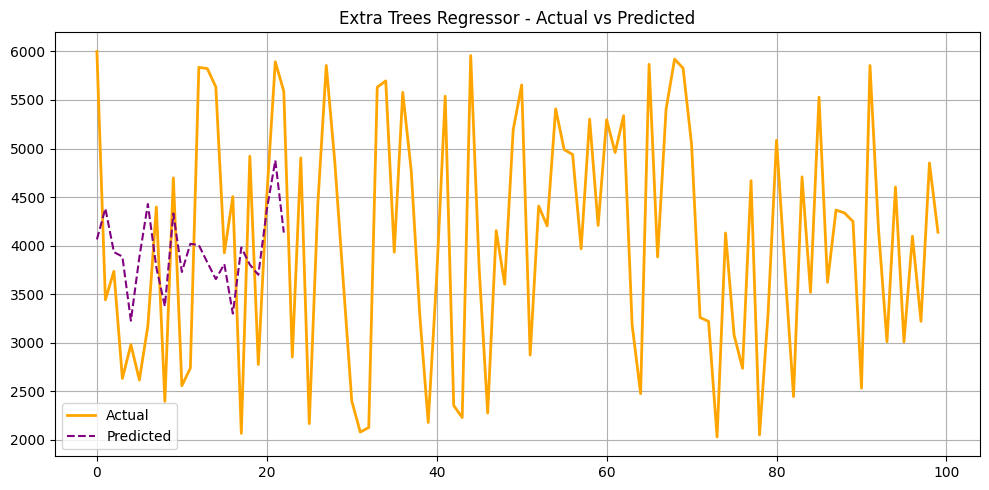


 Name: XGB Regressor
 R2 Score: 0.01
 MSE: 1326401.4502175176


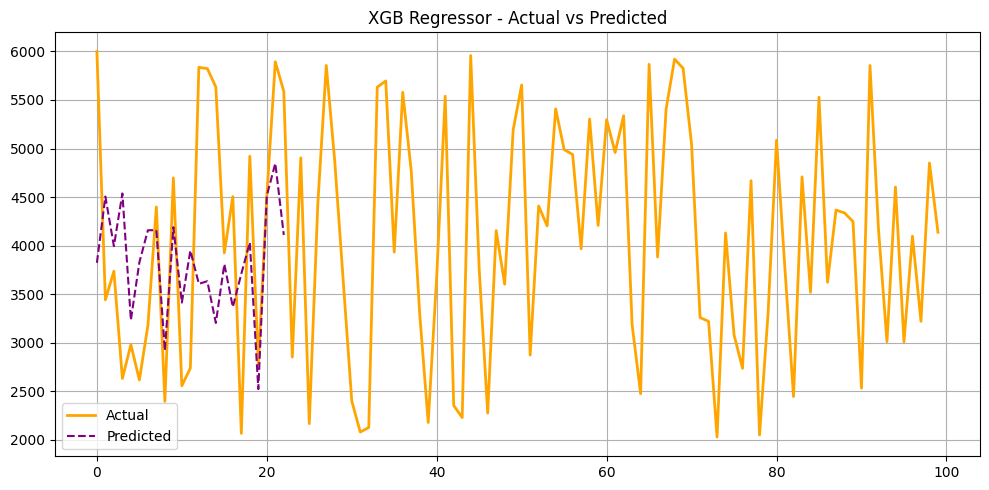

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 15
[LightGBM] [Info] Start training from score 3984.132069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

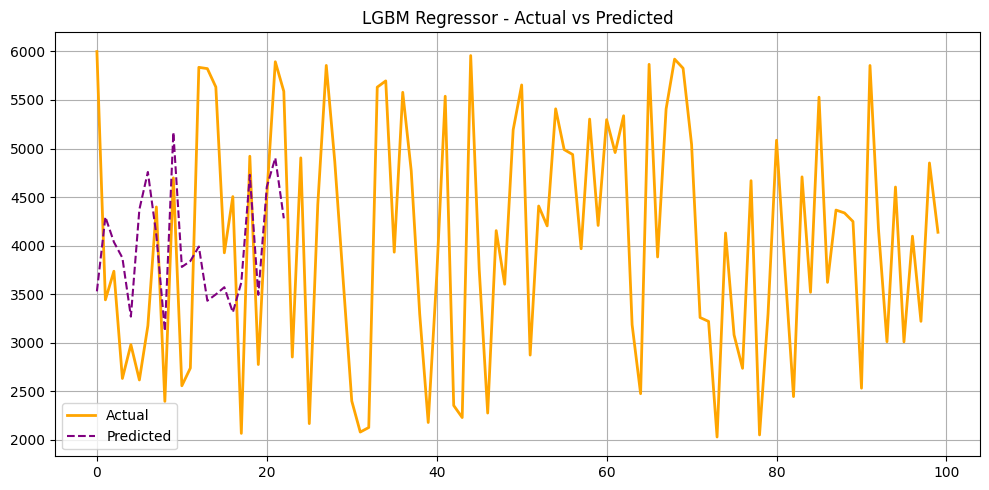


 Name: Linear Regression
 R2 Score: -0.18
 MSE: 1578904.3891004657


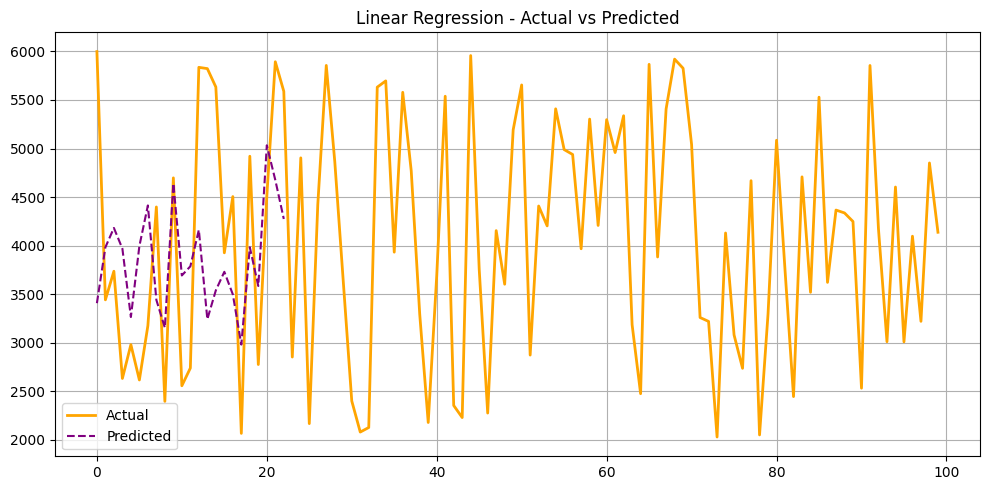


 Name: Random Forest
 R2 Score: 0.06
 MSE: 1261151.7097967612


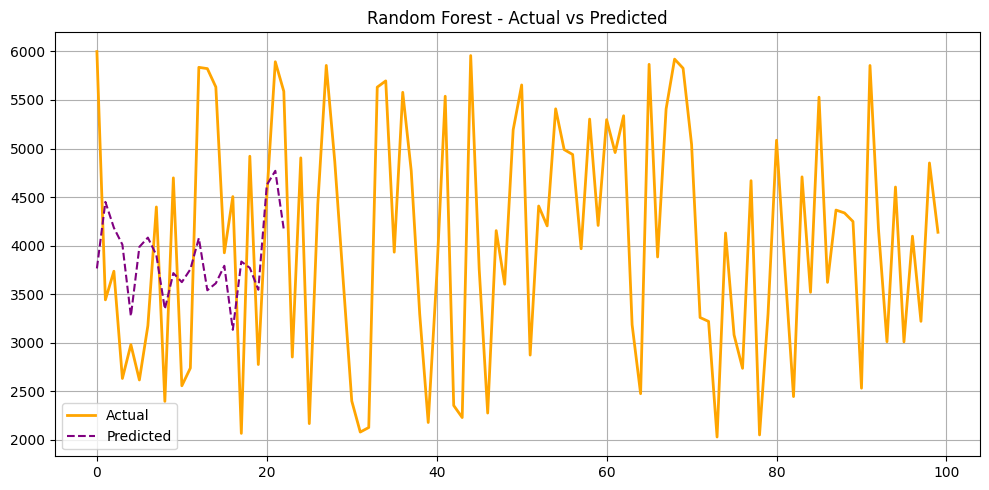


 Name: Gradient Boosting
 R2 Score: 0.11
 MSE: 1191193.2898260425


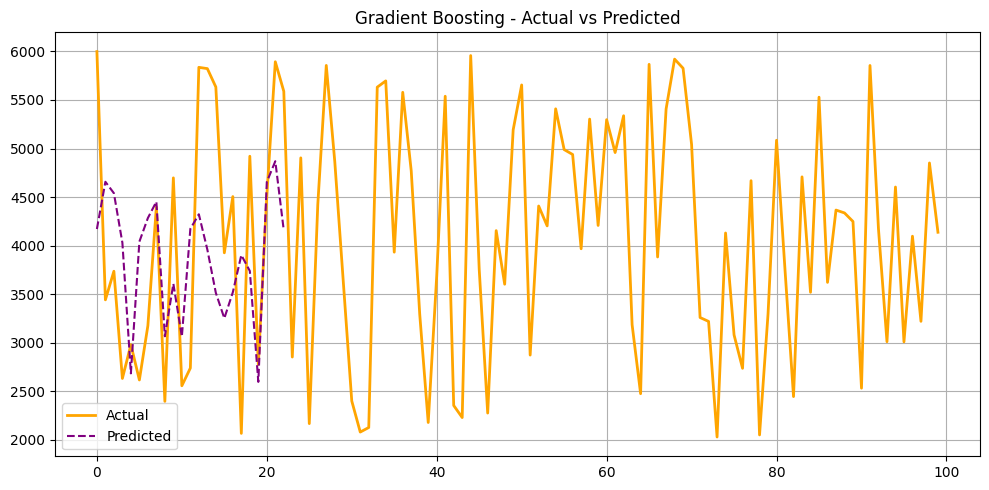


 Name: K-Nearest Neighbors
 R2 Score: -0.02
 MSE: 1367973.1649890433


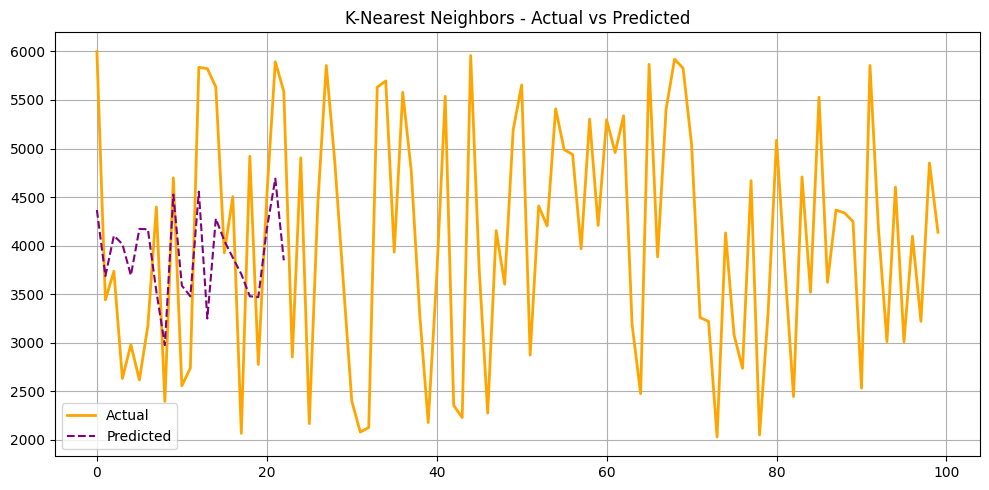


 Name: Decision Tree
 R2 Score: -1.41
 MSE: 3232084.0206608693


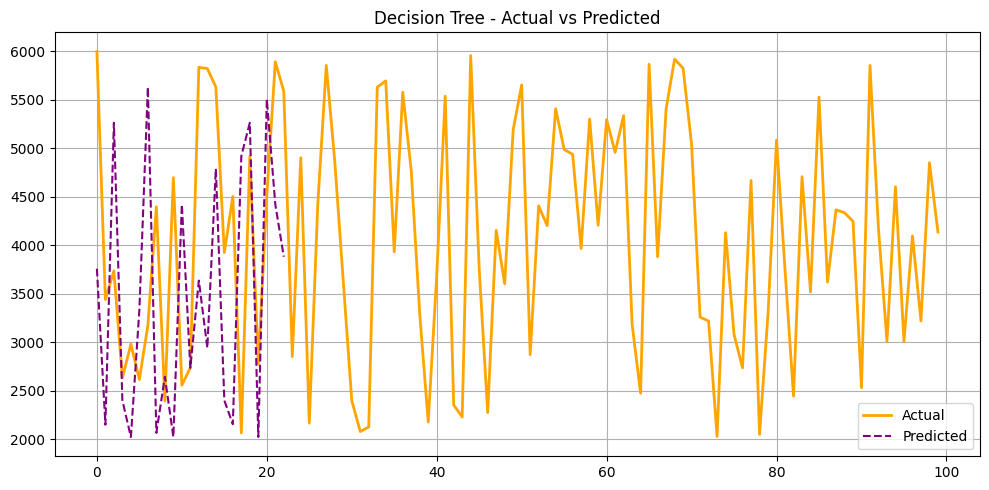


  Model Evaluation Summary:


,Model Name,R2 Score,MSE
0,Lasso,-0.176285,1.578877e+06
1,Cat Boost Regressor,0.067525,1.251621e+06
2,Ada Boost Regressor,0.101902,1.205478e+06
3,Extra Trees Regressor,0.053825,1.270010e+06
4,XGB Regressor,0.011813,1.326401e+06
5,LGBM Regressor,-0.060960,1.424081e+06
6,Linear Regression,-0.176305,1.578904e+06
7,Random Forest,0.060425,1.261152e+06
8,Gradient Boosting,0.112545,1.191193e+06
9,K-Nearest Neighbors,-0.019159,1.367973e+06


In [116]:
models = {
    "Lasso": Lasso(alpha=0.1),
    "Cat Boost Regressor": CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, random_state=42, verbose=0),
    "Ada Boost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(n_estimators=100,n_jobs=1,random_state=42),
    "XGB Regressor": XGBRegressor(colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8),
    "LGBM Regressor": LGBMRegressor(),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100,n_jobs=4),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}
summary = []
for names, model in models.items():
    model.fit(X_train_scaled1,y_train1)
    preds = model.predict(X_test_scaled1)
    score = r2_score(y_test1,preds)
    mse = mean_squared_error(y_test1,preds)

    print(f"\n Name: {names}")
    print(f" R2 Score: {score:.2f}")
    print(f" MSE: {mse}")

    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual', color='orange', linewidth=2)
    plt.plot(preds, label='Predicted', color='purple', linestyle='dashed')
    plt.title(f'{names} - Actual vs Predicted')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    summary.append({
        'Model Name': names,
        'R2 Score': score,
        'MSE':mse
    })
    new_df = pd.DataFrame(summary)
print("\n  Model Evaluation Summary:")
new_df